# 主成分分析

## 特異値分解
実行列$\mathsf{H}$は，$\mathsf{H}=\mathsf{U}\mathsf{\Lambda}\mathsf{V}^T$の形に分解できる．
但し，$\mathsf{U}$, $\mathsf{V}$は正規直交行列，$\mathsf{\Lambda}$は対角行列．

特異値分解を用いると
$\displaystyle \boldsymbol{x}_i=\sum_{j=1}^m=\lambda_jv_{ji}\boldsymbol{u}_j$
のように，各データ$\boldsymbol{x}_i$が共通の基底$\{\boldsymbol{u}_j\}$による展開が得られる．

In [1]:
import numpy as np
import csv
import matplotlib.pylab as plt

# データの読み込み
csvfile = open( "sunlit.csv", 'r' )
csvin = csv.reader(csvfile)


n = 0
for row in csvin:
  if n == 0:
    labels = row[1:]
    m = len(labels)
    xdata = np.ndarray((0,m))
    datelabels = []
  else:
    xtemp = np.reshape(np.array(row[1:]).astype("float"), (1,m))
    xdata = np.append( xdata, xtemp, axis=0 )
    datelabels.append(row[0])
  n += 1

n = n - 1

# 特異値分解
xd = (xdata - np.mean(xdata,0)).T
U,a,Vt = np.linalg.svd( xd )# aは特異値

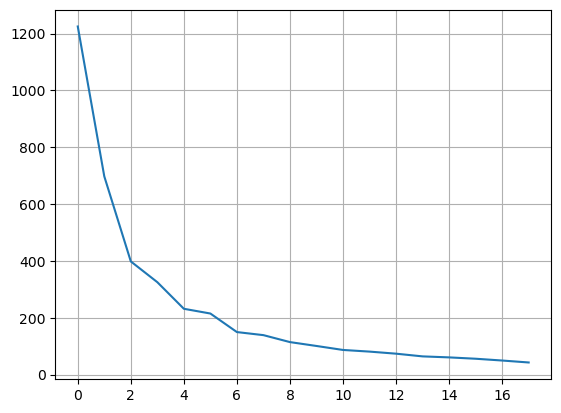

In [2]:
plt.plot(a)
plt.xticks(range(0,18,2))
plt.grid()
plt.show()

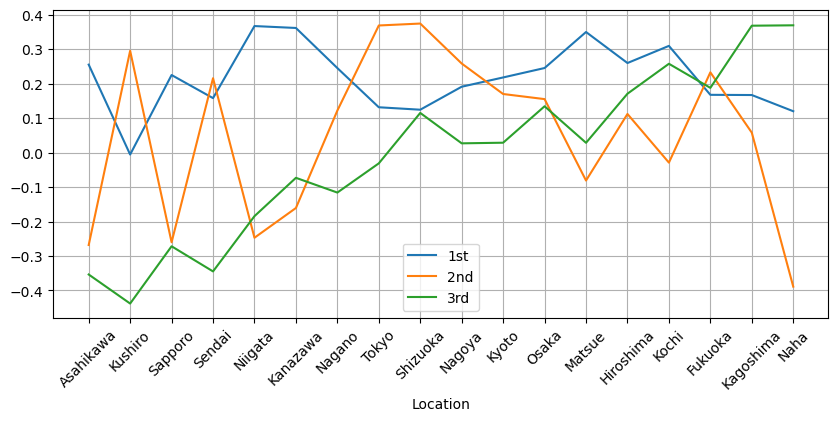

In [3]:
plt.figure(figsize = (10, 4))
plt.plot(U[:,0], label='1st')
plt.plot(U[:,1], label='2nd')
plt.plot(U[:,2], label='3rd')
plt.xlabel("Location")
plt.xticks(range(m), labels, rotation=45)
plt.legend()
plt.grid()
plt.show()

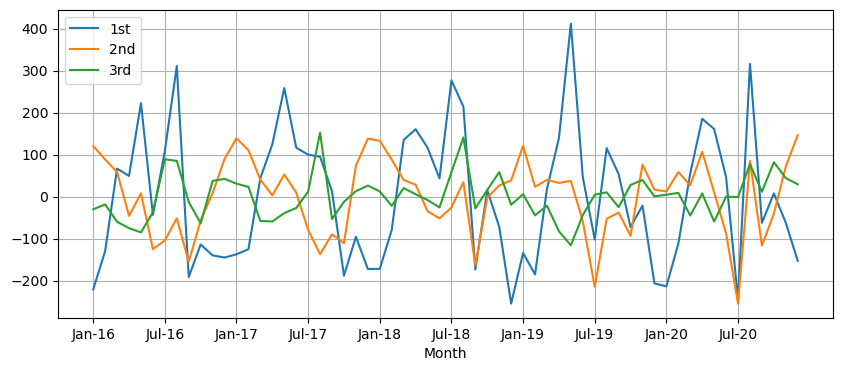

In [4]:
xmon = np.arange(0,n)

plt.figure(figsize = (10, 4))
plt.plot(xmon,a[0]*Vt[0,:], label='1st')
plt.plot(xmon,a[1]*Vt[1,:], label='2nd')
plt.plot(xmon,a[2]*Vt[2,:], label='3rd')
plt.xticks(range(0,n,6), datelabels[::6])
plt.xlabel("Month")
plt.legend()
plt.grid()
plt.show()